* In this kernel we are focusing on data preprocessing and data visualisation,
* We will analyze the impact of the parameters on price and 
* finally make a visualization from the comments about the houses.


# 1.Business Understanding


we can ask the following questions for understanding data and bussines 

* Q1: What is the relationship between some feature and price ?
* Q2 : What are the correlation between amenities & price and amenities & number of reviews ? 
* Q3 which are the most using word in reviews ?

# Data cleaning and exploration

In [1]:
# import required

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read Dataset
listing=pd.read_csv("listings.csv")

reviews=pd.read_csv("reviews.csv")

In [3]:
# information about the dataset

listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

* sorting mean for mising value 

In [4]:
listing.isnull().mean().sort_values(ascending=False)

neighbourhood_group_cleansed    1.000000
jurisdiction_names              1.000000
license                         1.000000
has_availability                1.000000
square_feet                     0.984379
                                  ...   
state                           0.000000
neighbourhood_cleansed          0.000000
street                          0.000000
host_identity_verified          0.000000
id                              0.000000
Length: 95, dtype: float64

* drop some features for missing value mean >98

In [5]:
listing.drop(["neighbourhood_group_cleansed","jurisdiction_names","license",
              "has_availability","square_feet"],axis=1,inplace=True)

* show data;  there are 3585 rows and 90 columns

In [6]:
print(listing.shape)

listing.head(5)

(3585, 90)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,10.0,9.0,9.0,f,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,9.0,10.0,f,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,10.0,10.0,f,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,9.0,10.0,f,f,flexible,f,f,1,2.25


* if We want to analyze the impact of the parameters on the price ,we should repalce $ character

In [7]:
listing['price']=listing['price'].str.replace('$', '')
listing['price']=listing['price'].str.replace(',', '')
listing['price']=listing['price'].astype('float');

# Data Visualisation for Some Variables

* Q1: What is the relationship between some feature and price ?

1. Let’s check that relationship between price and neighbourhood_cleansed with a boxplot.

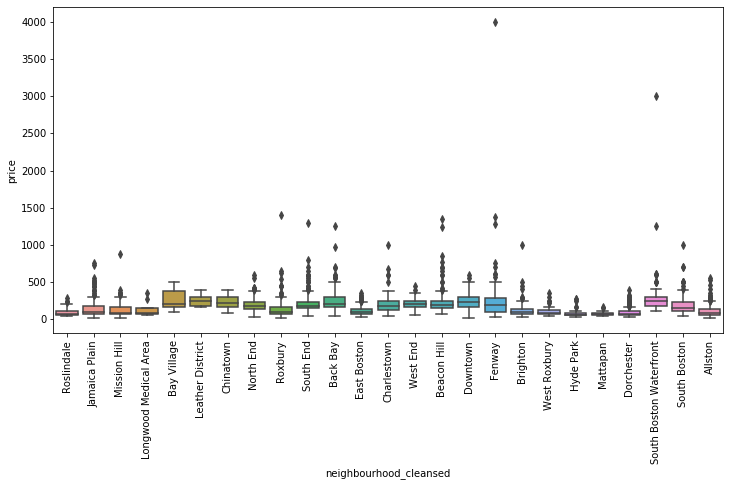

In [8]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'neighbourhood_cleansed', y = 'price',  data = listing)
xt = plt.xticks(rotation=90)

The areas of South Boston Waterfront, Bay Village and Back Bay have higher average prices


2. Let’s check that relationship between price and city with a barplot

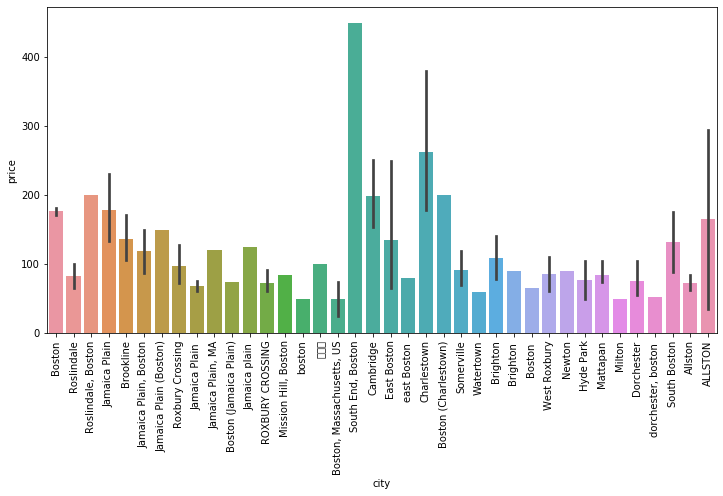

In [9]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'city', y = 'price',  data = listing)
xt = plt.xticks(rotation=90)

3.Let’s check that Number of listings by room_type with a bar graph

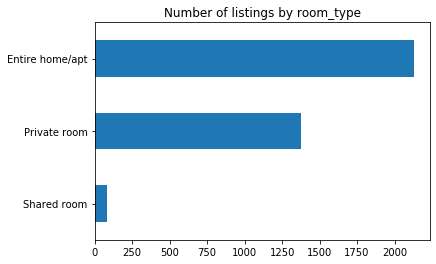

In [10]:
listing.room_type.value_counts().sort_values().plot.barh()
plt.title("Number of listings by room_type");

4.Let’s check that Number of listings by neighbourhood with a bar graph

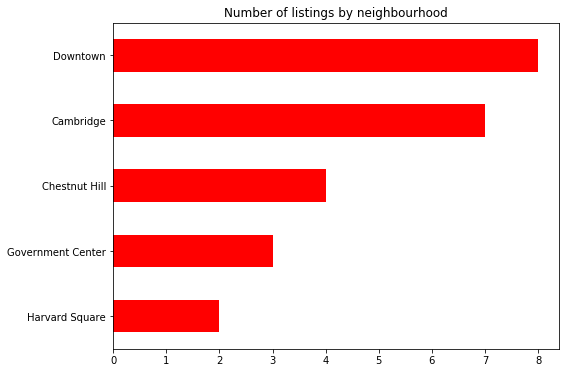

In [11]:
listing.neighbourhood.value_counts().sort_values(ascending=True).head().plot.barh(figsize=(8,6),color="r")
plt.title("Number of listings by neighbourhood");

5.Let’s check that Number of listings by host_name with a bar graph

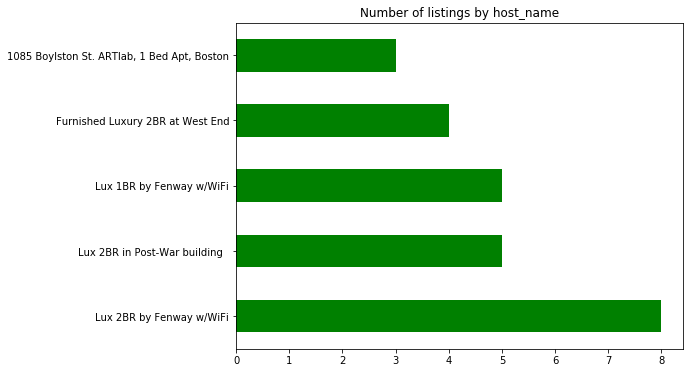

In [12]:
listing.name.value_counts().sort_values(ascending=False).head().plot.barh(figsize=(8,6),color="g")
plt.title("Number of listings by host_name");

# Select Some Variables for Modeling

 Some of the more important numerical features this dataset will look into are the following:
* accommodates: the number of guests the rental can accommodate
* bedrooms: number of bedrooms included in the rental
* bathrooms: number of bathrooms included in the rental
* beds: number of beds included in the rental
* price: nightly price for the rental
* minimum_nights: minimum number of nights a guest can stay for the rental
* maximum_nights: maximum number of nights a guest can stay for the rental
* number_of_reviews: number of reviews that previous guests have left
* amentities: What amentites they provide


# Numerical variables

In [15]:
# numeric feature in dataset

num_df=listing.select_dtypes(include=("int64","float64"))

In [16]:
num_df.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [17]:
num_df=num_df[["accommodates","bedrooms","bathrooms","beds","price","minimum_nights","maximum_nights","number_of_reviews"]]

In [18]:
num_df.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,4,2.0,1.5,3.0,250.0,2,1125,0
1,2,1.0,1.0,1.0,65.0,2,15,36
2,2,1.0,1.0,1.0,65.0,3,45,41
3,4,1.0,1.0,2.0,75.0,1,1125,1
4,2,1.0,1.5,2.0,79.0,2,31,29


In [19]:
num_df.isnull().sum().sort_values(ascending=False)

bathrooms            14
bedrooms             10
beds                  9
number_of_reviews     0
maximum_nights        0
minimum_nights        0
price                 0
accommodates          0
dtype: int64

In [20]:
#fill NaN data with mean in the dataframe and display the data

num_df=num_df.apply(lambda x : x.fillna(x.mean()))

num_df.head(5)

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,4,2.0,1.5,3.0,250.0,2,1125,0
1,2,1.0,1.0,1.0,65.0,2,15,36
2,2,1.0,1.0,1.0,65.0,3,45,41
3,4,1.0,1.0,2.0,75.0,1,1125,1
4,2,1.0,1.5,2.0,79.0,2,31,29


# Categorical variables

In [21]:
# Categorical feature in dataset

cat_df = listing.select_dtypes(include=['object'])

cat_df.head(2)

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/12147973,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...",...,$0.00,2 weeks ago,2016-09-06,NaN,NaN,f,f,moderate,f,f
1,https://www.airbnb.com/rooms/3075044,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,...,$0.00,a week ago,2016-09-06,2014-06-01,2016-08-13,f,t,moderate,f,f


In [22]:
cat_df=cat_df[["city","is_location_exact", 'property_type', 'room_type',
               'bed_type','requires_license', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification']]

In [23]:
cat_df.isnull().sum().sort_values(ascending=False)

property_type                       3
city                                2
require_guest_phone_verification    0
require_guest_profile_picture       0
cancellation_policy                 0
instant_bookable                    0
requires_license                    0
bed_type                            0
room_type                           0
is_location_exact                   0
dtype: int64

* Q2 : What are the correlation between amenities & price and amenities & number of reviews ? 

In [24]:
df_amen=listing["amenities"].astype('str')
df_amen=pd.DataFrame(df_amen.apply(lambda x : x.replace("{","").replace("}","").replace('"',"") ))


amenities=np.unique(np.concatenate(df_amen["amenities"].apply(lambda x : x.split(","))))
df_amen_arr=np.array([df_amen['amenities'].apply(lambda x: i in x) for i in amenities])



In [25]:
amen_price=pd.concat([num_df["price"],pd.DataFrame(data=df_amen_arr.T, columns=amenities).iloc[0:,1:44]], axis=1)

In [26]:
amen_price.corr().iloc[1:45,0:1].sort_values(by='price',ascending=False).head(10)

,price
TV,0.248912
Cable TV,0.226981
Family/Kid Friendly,0.226539
Elevator in Building,0.221503
Air Conditioning,0.220434
Gym,0.184463
Doorman,0.176637
Washer,0.125687
24-Hour Check-in,0.113627
Dryer,0.105467


In [27]:
amen_reviews=pd.concat([num_df["number_of_reviews"],pd.DataFrame(data=df_amen_arr.T, columns=amenities).iloc[0:,1:44]], axis=1)

In [28]:
amen_reviews.corr().iloc[1:45,0:1].sort_values(by='number_of_reviews',ascending=False).head(10)

,number_of_reviews
First Aid Kit,0.145902
Carbon Monoxide Detector,0.107706
Air Conditioning,0.098078
Breakfast,0.091203
Fire Extinguisher,0.089247
Shampoo,0.080460
Pets live on this property,0.079470
Safety Card,0.078366
Smoke Detector,0.075876
24-Hour Check-in,0.069741


In [31]:
# concat amenities variables and categorical variables

cat_df_final=pd.concat([cat_df,pd.DataFrame(data=df_amen_arr.T, columns=amenities).iloc[0:,1:44]], axis=1)

* We use LabelEncoder for categorical feature transformation

In [35]:
for i in cat_df_final:
    cat_df_final[i]=cat_df_final[i].astype("str")

In [36]:
from sklearn.preprocessing import LabelEncoder

LBL=LabelEncoder()



for i in cat_df_final:
    cat_df_final[i]=LBL.fit_transform(cat_df_final[i])



In [37]:
cat_df_final.head()

,city,is_location_exact,property_type,room_type,bed_type,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,12,1,12,0,4,0,0,1,0,0,...,0,1,1,0,0,1,1,0,0,1
1,12,1,0,1,4,0,1,1,0,0,...,0,1,1,0,0,1,1,0,0,1
2,12,1,0,1,4,0,0,1,1,0,...,1,1,1,0,0,1,1,0,0,1
3,12,0,12,1,4,0,0,1,0,0,...,1,1,1,0,0,1,1,0,0,1
4,12,1,12,1,4,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [38]:
# we ara concat numeraical feature dataset and categorical fetarue dataset

df_final=pd.concat([num_df,cat_df_final], axis=1)

In [39]:
X=df_final.drop("price",axis=1)
y=df_final[["price"]]

In [40]:
X.shape

(3585, 60)

In [41]:
y.shape

(3585, 1)

## Price Prediction

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42  )



In [43]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score

random_forest=RandomForestClassifier(random_state=45)

random_forest.fit(X_train,y_train)


y_pred=random_forest.predict(X_test)



print("accuracy_score: ",accuracy_score(y_test, y_pred))
print("mean_squared_error:",mean_squared_error(y_test, y_pred))




accuracy_score:  0.1421933085501859
mean_squared_error: 26116.825278810407


* With this model, the features explain approximately 14% of the variance in the target variable , We shuld improve model for new feature 

# Feature İmportance

In [44]:
importance=pd.DataFrame({"importance":random_forest.feature_importances_*100}, index=X_train.columns)
importance.sort_values(by=["importance"],ascending=False)[0:10]

,importance
number_of_reviews,9.564332
minimum_nights,5.263682
accommodates,4.334860
maximum_nights,4.095742
cancellation_policy,3.890117
beds,2.672494
property_type,2.572436
bathrooms,2.510121
Fire Extinguisher,2.456967
Family/Kid Friendly,2.336755


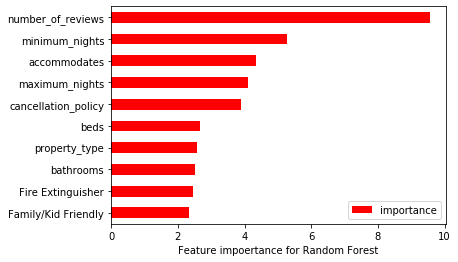

In [45]:
importance.sort_values(by=["importance"],ascending=False)[0:10].sort_values(by="importance",
                       ascending=True,
                       axis=0).plot(kind="barh",color="R")
plt.xlabel("Feature impoertance for Random Forest");

In [46]:
# number of reviews describe

df_final["number_of_reviews"].describe()

count    3585.000000
mean       19.044630
std        35.571658
min         0.000000
25%         1.000000
50%         5.000000
75%        21.000000
max       404.000000
Name: number_of_reviews, dtype: float64

In [47]:
# find listing id for  max number_of_reviews 
listing[listing["number_of_reviews"]==404]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
414,66288,https://www.airbnb.com/rooms/66288,20160906204935,2016-09-07,Architects Live-in Studio in Boston,NaN,"Apartment now has permanent, hi-speed cable in...","Apartment now has permanent, hi-speed cable in...",none,NaN,...,9.0,9.0,8.0,f,t,moderate,f,f,7,5.87


* Q3 which are the most using word in reviews ?

In [48]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [49]:
review_cloud=reviews[reviews["listing_id"]==66288]

# Review on wordcloud

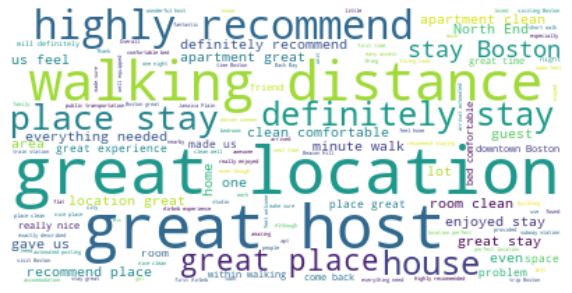

In [50]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator


text = " ".join(review for review in reviews.comments.astype("str"))



wc=WordCloud( max_font_size=50,max_words=1000,background_color="white",contour_color="firebrick",contour_width=3)

wc.generate(text)


plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()
